this is a chat place for those who wants to say HELLO

<b>HELLLO FROM SERRY</b>

<b>HALLO FROM IBRAHIM</b>

Next time, please use PDF file so it can be annotated on LMS.

<h1>Doctors Notes </h1>

Some comments:

- (not applicipal) Use this dataset (and see codes of others): https://www.kaggle.com/competitions/movie-reviews-classification/overview

it has metadata: movie_name, genre,  ... etc.

- You need some EDA: see for example these linkes:

1- https://medium.com/@pyashpq56/sentiment-analysis-on-imdb-movie-review-d004f3e470bd

2- See the code here https://www.kaggle.com/code/gpreda/movie-reviews-eda-model it was the top participants in the competition.



Next steps (for literature review):

1- include the dataset mentioned above.

2- Discuss and try some approaches used in the literature for sentiment classification and report them as elementary results.

3- EDA: maybe use pandas to explore the datasets; perform some statistics. Also you can do basic NLP here such as the most positive words, negative words .. etc. You might use n-grams as well with a word cloud. Use the second dataset to explore sentiment per genre ... etc.

see the attached annotated file for details.

<h2>Phase two notes</h2>
In this phase, provide a detailed document with the following:

1- detailed description of the problem and how did you start to solve it?

2- details about the dataset: size, labels, metadata, and limitations.(we can write that we do not have a lot of metadata in the dataset only the reviews)

3- exploratory data analysis (EDA): investigate the datasets deeper. For example, if you do sentiment analysis for product reviews, analyze the most positive/negative words. What words are associated with different types of products? Does sentiment distribution change with different types of products?

4- Discuss the literature: relevant problems and models. Also, include some feature engineering/components used in the literature. Good resources would be Kaggle (some codes on the same datasets), and Google scholar. This section should expand what you have done in the proposal section 6. You should compare different approaches and discuss why you would (or wouldn't) use some approaches in the literature.

5- Elementary experiments: start some elementary machine learning/NLP experiments for which describe models and features used. Also, report the results using the appropriate metrics and perform error analysis. Then describe different approaches for reducing the errors.

<h1>Our Plan</h1>

<b>Cleaning</b>:

- we remove '#' sign 
- we remove HTML tags
- we remove '$' sign 

<b>EDA </b>: <br>
<input type="checkbox">
<label>Frequenct words</label><br>
<input type="checkbox">
<label>length of the review (also make a simple model)</label><br>
<input type="checkbox">
<label>number of data in each (add new data for the dataframe for complex models)</label><br>
<input type="checkbox">
<label>unique words in both</label><br>
<input type="checkbox">
<label>cloud of words (both neg and positive)</label><br>
<input type="checkbox">
<label>graph for each part</label><br>

<b>PreProcessing  </b>: <br>
<input type="checkbox">
<label>n-gram (3 types)</label><br>
<input type="checkbox">
<label>graph for each N-gram</label><br>
<input type="checkbox">
<label>Bag of words</label><br>
<input type="checkbox">
<label>TF-IDF</label><br>

<b>Models: </b>: <br>
* we will build one simple model:
1) number of words in the sentence 
* SVM (NO)
* Naiave bayes
* MultiNomial NB 
* light GBM (Later)
* Logistic 
* KNN
* LSTM

some notes: we need to complate the models (CNN and others)
complate the Lemmatization with NLTK 
GaussianNB for classifaction


## NLP Project (Sentemint Analysis)
<ul>
<li> cleaing the data </li>
<li> Data science work as following: 
    <ul>
        <li>Frequent words per each category</li>
        <li>long of the review</li>
    </ul>
</li>
<li> Some graphs about the data </li>
<li> Data science work as following: </li>
<li>make small (stupid) model for the data (like avrage words </li>

<h4>
please let us write good ideas because our data set is not very 
</h4>
   
</ul>

In [ ]:
# this is the first comment here 
import pandas as pd
import nltk
import re
from collections import Counter
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import matplotlib
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix

nltk.download('stopwords')

df = pd.read_csv("IMDB Dataset.csv")

cdf = df.copy()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
cdf.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


In [ ]:
# functions to do the Cleaning 


def rem_html(text):
    return re.sub("<[^>]+>"," ", text)

def rem_url(text):
    return re.sub("\w+://\S+"," ", text)

def rem_date(text):
    return re.sub("([0-9]{2}-[0-9]{1,2}-[0-9]{4})|([0-9]{2}/[0-9]{1,2}/[0-9]{4})"," ",text)

def rem_specialChar(text):
   return re.sub('[^a-zA-z0-9\s]'," ",text)

def lowerCase(text):
    return(text.lower())
    

In [ ]:
#set stopwords to english
stop=set(stopwords.words('english'))
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer=ToktokTokenizer()
stopword_list=nltk.corpus.stopwords.words('english')

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [ ]:
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text

In [ ]:
#Cleaning Apply function 
df['review'] = df['review'].apply(rem_html)
df['review'] = df['review'].apply(rem_url)
df['review'] = df['review'].apply(rem_date)
df['review'] = df['review'].apply(remove_stopwords)
df['review'] = df['review'].apply(simple_stemmer)
df['review'] = df['review'].apply(rem_specialChar)
df['review'] = df['review'].apply(lowerCase)

In [ ]:
df['review'].head()

0    one review mention watch 1 oz episod   hooked ...
1    wonder littl production  film techniqu unassum...
2    thought wonder way spend time hot summer weeke...
3    basic   famili littl boy   jake   think   zomb...
4    petter mattei     love time money   visual stu...
Name: review, dtype: object

In [ ]:
positivedf = df[df['sentiment'] == 'positive']#Positive Reviews
negativedf = df[df['sentiment'] == 'negative']#Negative Reviews

positivejoin = Counter((" ".join(positivedf['review']).split()))#Count Frequency of All words in the positive reviews

print("10 Most common positive words: ")
print(positivejoin.most_common(30))

######################################
negativejoin = Counter((" ".join(negativedf['review']).split()))#Count Frequency of All words in the negative reviews

print("10 Most common Negative words: ")
print(negativejoin.most_common(30))

10 Most common positive words: 
[('film', 49891), ('movi', 38710), ('one', 27997), ('like', 20096), ('time', 15644), ('good', 15245), ('see', 14829), ('make', 13363), ('great', 13097), ('well', 13032), ('get', 12640), ('watch', 12634), ('stori', 12619), ('charact', 12572), ('love', 12270), ('show', 10884), ('also', 10793), ('realli', 10638), ('would', 10595), ('play', 9945), ('even', 9880), ('scene', 9447), ('first', 9235), ('much', 9201), ('end', 8807), ('way', 8689), ('best', 8520), ('think', 8442), ('go', 8270), ('peopl', 8267)]
10 Most common Negative words: 
[('movi', 50344), ('film', 44101), ('one', 26866), ('like', 24159), ('make', 15686), ('even', 15405), ('get', 15208), ('good', 14915), ('bad', 14775), ('watch', 14651), ('time', 14596), ('would', 14007), ('charact', 13013), ('see', 12992), ('realli', 12137), ('look', 11676), ('scene', 10771), ('much', 10117), ('act', 9920), ('go', 9825), ('stori', 9738), ('could', 9299), ('end', 9258), ('thing', 9230), ('peopl', 8986), ('think

In [ ]:
unpositive = set(" ".join(positivedf['review']).split())
print("Unique Positive words:")
print(len(unpositive))
############################################
unNegative = set(" ".join(negativedf['review']).split())
print("Unique Negative words:")
print(len(unNegative))

Unique Positive words:
64913
Unique Negative words:
62591


this is for neg


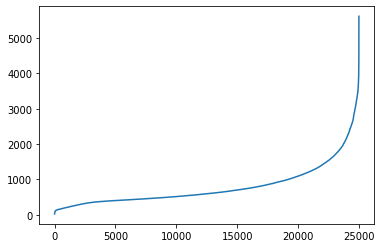

this is for pos


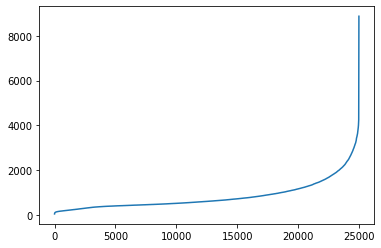

In [ ]:
# number of letters in 
num_chr_pos = []
num_chr_neg = []
# length of words in post
for i in positivedf['review']:
    num_chr_pos.append(len(i))
for i in negativedf['review']:
    num_chr_neg.append(len(i))

#WORKING
#print(num_chr_pos)
#print(num_chr_neg)

num_chr_pos = sorted(num_chr_pos)
num_chr_neg = sorted(num_chr_neg)

# print(num_chr_pos)
# print(num_chr_neg)
print("this is for neg")
plt.plot(num_chr_neg)
plt.show()
print("this is for pos")
plt.plot(num_chr_pos)





[69, 85, 64, 50, 85, 230, 50, 71, 114, 62, 87, 177, 75, 71, 62, 58, 112, 183, 38, 168, 143, 57, 100, 144, 44, 74, 63, 109, 111, 108, 90, 75, 75, 22, 109, 202, 67, 103, 163, 121, 140, 169, 296, 81, 75, 134, 222, 35, 67, 143, 73, 110, 209, 88, 77, 96, 77, 92, 381, 92, 159, 72, 103, 20, 47, 45, 145, 122, 88, 61, 231, 70, 71, 64, 109, 214, 139, 144, 238, 160, 245, 130, 66, 153, 93, 108, 95, 47, 462, 73, 103, 29, 294, 33, 114, 49, 183, 119, 82, 138, 144, 463, 122, 63, 279, 135, 37, 140, 52, 256, 65, 93, 117, 103, 63, 57, 84, 61, 75, 285, 27, 65, 75, 59, 76, 50, 149, 123, 34, 69, 101, 67, 62, 88, 101, 71, 73, 80, 88, 195, 161, 195, 55, 219, 72, 138, 461, 68, 93, 302, 75, 123, 98, 353, 82, 58, 77, 88, 67, 234, 69, 85, 77, 64, 39, 62, 58, 67, 36, 190, 167, 201, 379, 29, 139, 55, 69, 292, 73, 58, 85, 156, 175, 94, 68, 188, 55, 168, 117, 77, 209, 23, 97, 122, 548, 188, 66, 152, 147, 40, 155, 107, 20, 169, 120, 63, 98, 157, 102, 80, 91, 218, 90, 59, 331, 72, 9, 67, 32, 72, 275, 177, 200, 84, 195,

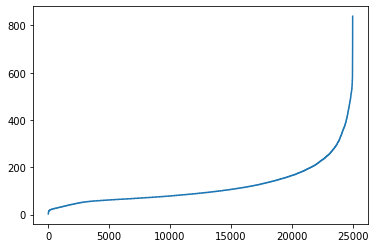

this is for pos


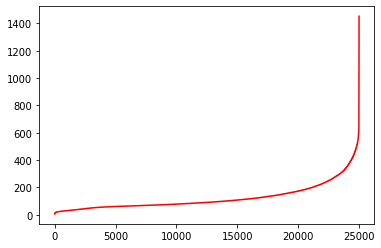

In [ ]:
# Number of words in the reviews 
num_word_pos = []
num_word_neg = []
# length of words in post
for i in positivedf['review']:
    num_word_pos.append(len(i.split()))
for i in negativedf['review']:
    num_word_neg.append(len(i.split()))


print(num_word_neg)
print(num_word_pos)


num_word_pos = sorted(num_word_pos)
num_word_neg = sorted(num_word_neg)

# print(num_chr_pos)
# print(num_chr_neg)
print("this is for neg")
plt.plot(num_word_neg)
plt.show()
print("this is for pos")
plt.plot(num_word_pos,color="red")


[1, 2, 2, 4, 3, 6, 6, 9, 17, 10, 10, 22, 22, 44, 36, 55, 65, 83, 84, 81, 106, 97, 101, 116, 117, 108, 106, 112, 100, 105, 93, 120, 100, 103, 87, 90, 104, 92, 95, 88, 106, 94, 101, 108, 106, 117, 141, 158, 164, 166, 186, 199, 242, 277, 271, 304, 288, 318, 295, 345, 325, 310, 266, 308, 287, 314, 255, 272, 283, 254, 249, 229, 223, 201, 219, 208, 220, 192, 174, 208, 190, 178, 177, 189, 192, 176, 176, 154, 182, 146, 160, 151, 139, 145, 158, 124, 123, 129, 143, 121, 133, 123, 128, 112, 122, 94, 134, 110, 112, 118, 107, 107, 92, 94, 99, 115, 83, 96, 69, 75, 86, 82, 87, 84, 89, 60, 64, 75, 85, 90, 70, 91, 69, 80, 87, 70, 70, 86, 58, 68, 66, 56, 57, 55, 55, 61, 69, 57, 71, 56, 65, 52, 60, 56, 52, 64, 58, 59, 64, 55, 50, 58, 45, 55, 57, 47, 66, 46, 59, 45, 52, 53, 42, 36, 45, 44, 42, 58, 44, 42, 33, 41, 32, 38, 40, 42, 46, 58, 29, 33, 38, 45, 41, 37, 35, 35, 29, 23, 21, 41, 35, 30, 32, 26, 28, 39, 41, 32, 29, 21, 35, 37, 27, 41, 29, 24, 22, 25, 30, 21, 30, 32, 31, 21, 22, 23, 20, 18, 32, 28, 22,

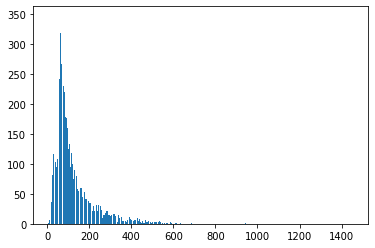

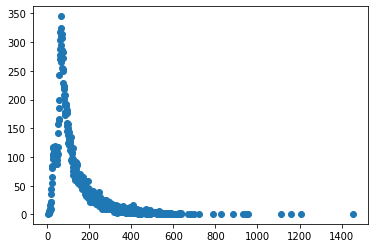

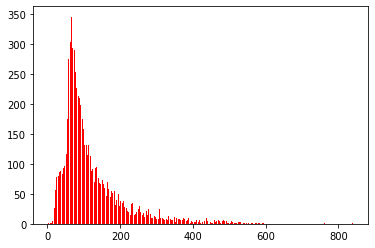

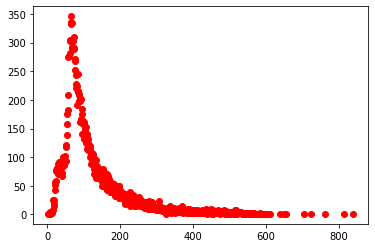

In [ ]:
#print(Counter(num_word_neg))
#print(Counter(num_word_pos))
pos_most_words = dict(Counter(num_word_pos))
neg_most_words = dict(Counter(num_word_neg))

print(list(pos_most_words.values()))
print(list(neg_most_words.keys()))

names = list(pos_most_words.keys())
values = list(pos_most_words.values())

#plt.figure(figsize=(90,40))

#plt.plot(names, values)
#plt.show()
plt.bar(names, values)
plt.show()
plt.scatter(names, values)
plt.show()


names = list(neg_most_words.keys())
values = list(neg_most_words.values())



#plt.plot(names, values,color="red")
#plt.show()
plt.bar(names, values,color="red")
plt.show()
plt.scatter(names, values,color="red")
plt.show()

In [ ]:
# num_word_pos = []
# num_word_neg = []
#length of all
print(len(num_word_pos))
print(len(num_word_neg))
# max length of words
print(num_word_pos[-1])
print(num_word_neg[-1])
# # min length of words
print(num_word_pos[0])
print(num_word_neg[0])

#print(pos_most_words)

25000
25000
1453
839
6
3


In [ ]:
def word_Cloud(df,max_words, dfname):
    text = " ".join(df['review'])
    stop=set(stopwords.words('english'))
    wordcloud = WordCloud(stopwords=stop, background_color="white", max_words=max_words).generate(text)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Most Common " + str(max_words) + " Words in the " + dfname)
    plt.show()

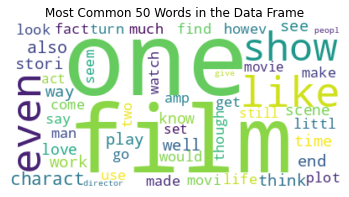

In [ ]:
word_Cloud(df,50, "Data Frame")

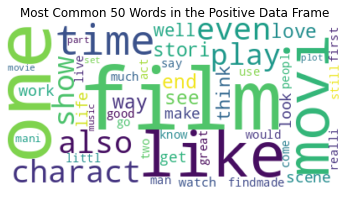

In [ ]:
word_Cloud(positivedf,50, "Positive Data Frame")

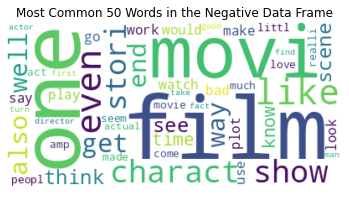

In [ ]:
word_Cloud(negativedf,50, "Negative Data Frame")

In [ ]:
########Train Test Split
RAND_STATE = 476
test_size = 0.25
idx_train, idx_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.25, random_state=RAND_STATE)

In [ ]:
########Create Bag of Words
#Count vectorizer for bag of words
cv=CountVectorizer()

#transformed train reviews
bow_train=cv.fit_transform(idx_train)

#transformed test reviews
bow_test=cv.transform(idx_test)


In [ ]:
#############Create the TFIDF
#Tfidf vectorizer
tv=TfidfVectorizer()

#transformed train reviews
tfidf_train=tv.fit_transform(idx_train)

#transformed test reviews
tfidf_test=tv.transform(idx_test)

In [ ]:
#Confusion Matrix
def conmat(y_test, y_pred):
    #Generate the confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

              precision    recall  f1-score   support

    negative       0.87      0.85      0.86      6428
    positive       0.84      0.86      0.85      6072

    accuracy                           0.86     12500
   macro avg       0.86      0.86      0.86     12500
weighted avg       0.86      0.86      0.86     12500



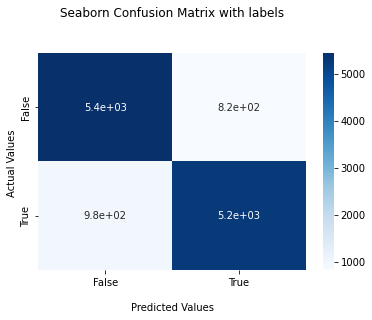

In [ ]:
#########MultiNomial NB With Bag of words
clf = MultinomialNB()
# fit the classifier on the X_train and y_train
clf.fit(bow_train, y_train)
#
y_pred = clf.predict(bow_test)

print(classification_report(y_pred, y_test))
conmat(y_test, y_pred)

              precision    recall  f1-score   support

    negative       0.88      0.89      0.88      6160
    positive       0.89      0.88      0.88      6340

    accuracy                           0.88     12500
   macro avg       0.88      0.88      0.88     12500
weighted avg       0.88      0.88      0.88     12500



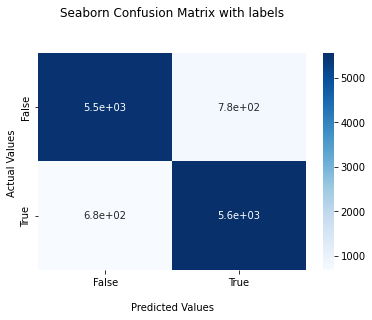

In [ ]:
##############Logistic Regression With Bag of words 
clf = LogisticRegression(solver='lbfgs', max_iter=1000)


# Q: fit
clf.fit(bow_train,y_train)
# Q: predict
y_pred = clf.predict(bow_test)
print(classification_report(y_pred, y_test))
conmat(y_test, y_pred)

              precision    recall  f1-score   support

    negative       0.87      0.86      0.86      6347
    positive       0.86      0.87      0.86      6153

    accuracy                           0.86     12500
   macro avg       0.86      0.86      0.86     12500
weighted avg       0.86      0.86      0.86     12500



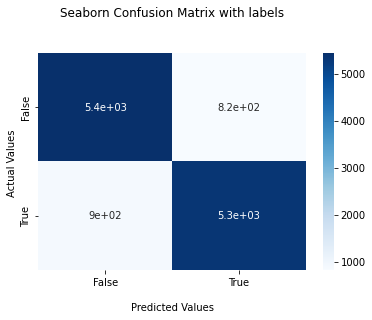

In [ ]:
#########MultiNomial NB With TFIDF
clf = MultinomialNB()
# fit the classifier on the X_train and y_train
clf.fit(tfidf_train, y_train)
#
y_pred = clf.predict(tfidf_test)

print(classification_report(y_pred, y_test))
conmat(y_test, y_pred)

              precision    recall  f1-score   support

    negative       0.88      0.90      0.89      6080
    positive       0.91      0.88      0.89      6420

    accuracy                           0.89     12500
   macro avg       0.89      0.89      0.89     12500
weighted avg       0.89      0.89      0.89     12500



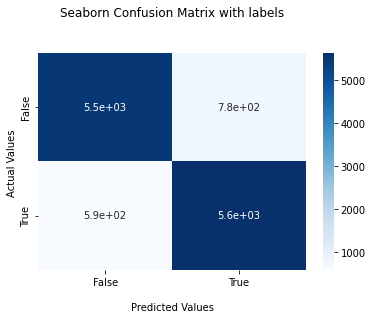

In [ ]:
##############Logistic Regression With TFIDF
clf = LogisticRegression(solver='lbfgs', max_iter=1000)


# Q: fit
clf.fit(tfidf_train,y_train)
# Q: predict
y_pred = clf.predict(tfidf_test)
print(classification_report(y_pred, y_test))
conmat(y_test, y_pred)

              precision    recall  f1-score   support

    negative       0.70      0.62      0.66      7068
    positive       0.57      0.66      0.61      5432

    accuracy                           0.64     12500
   macro avg       0.64      0.64      0.63     12500
weighted avg       0.64      0.64      0.64     12500



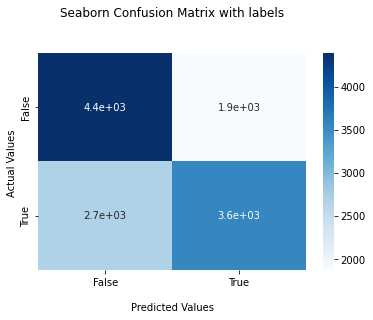

In [ ]:
#from sklearn.naive_bayes import MultinomialNB

knn = KNeighborsClassifier(n_neighbors=7)

#clf = MultinomialNB()
# fit the classifier on the X_train and y_train
knn.fit(bow_train, y_train)
#
y_pred = knn.predict(bow_test)

print(classification_report(y_pred, y_test))
conmat(y_test, y_pred)

In [ ]:
#from sklearn.naive_bayes import MultinomialNB

knn = KNeighborsClassifier(n_neighbors=1000)

#clf = MultinomialNB()
# fit the classifier on the X_train and y_train
knn.fit(bow_train, y_train)
#
y_pred = knn.predict(bow_test)

print(classification_report(y_pred, y_test))
conmat(y_test, y_pred)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e0cd0f83-f874-46b0-9204-10aa69dd4ce8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>